In [ ]:
import pandas as pd
import numpy as np
import glob
import imageio
import matplotlib.pyplot as plt
import sklearn
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
project_path = "/content/drive/MyDrive/MAJOR PROJECT/General meet(10.04.22)/LEATHER DATASET"

picture shape: (256, 4096, 3)
picture matrix: 
 [[[ 86  78  75]
  [ 86  78  75]
  [ 84  76  73]
  ...
  [ 93  84  77]
  [ 92  83  76]
  [ 92  83  76]]

 [[ 83  75  72]
  [ 83  75  72]
  [ 83  75  72]
  ...
  [ 78  69  62]
  [ 76  67  60]
  [ 74  65  58]]

 [[ 85  77  75]
  [ 85  77  75]
  [ 86  78  76]
  ...
  [ 83  74  67]
  [ 82  73  66]
  [ 82  73  66]]

 ...

 [[ 64  66  81]
  [ 65  64  80]
  [ 64  63  79]
  ...
  [133 108  88]
  [134 109  89]
  [134 109  89]]

 [[182 134  72]
  [181 132  73]
  [178 132  72]
  ...
  [128 105  87]
  [130 107  89]
  [131 108  90]]

 [[167 115  65]
  [163 113  64]
  [156 108  60]
  ...
  [120  97  81]
  [120  97  81]
  [119  96  80]]]


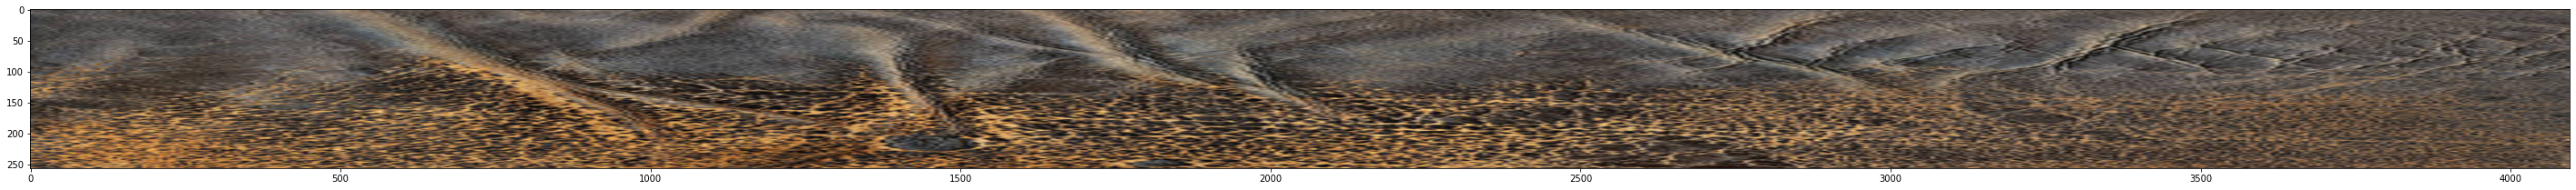

In [ ]:
# load a picture
pic = project_path + "/DEFECT IMAGES /45.jpg"
im = imageio.imread(pic)
print("picture shape: {}".format(im.shape))
print("picture matrix: \n {}".format(im))
# set display size
plt.figure(figsize=(50,50))
plt.imshow(im, cmap='gray')
plt.show()

In [ ]:
def load_file(file_path, label):
    
    """
    TODO: load the file then create the dict object and append to list
    Return: numpyarray
    Description: object {
                  "name" : file name
                  "label" : label
                  "data" : image
                  }
    """

    # declare the folder name
    folder_name = file_path.split("/")[-1]
    # declare output list
    out_list = []
    # load every file that .png format
    for image_path in glob.glob(file_path + "/*.png") or glob.glob(file_path + "/*.jpg"):
        # read image file
        image = imageio.imread(image_path)
        # declare temporary dict dtype
        temp = {}
        # set the file name
        temp["name"] = image_path.split("/")[-1]
        # set the file label, 0 for non defect. 1 for defect
        temp["label"] = label

        # There are somes images are tensor dtype
        # Thus I fix by selecting only a tensor index zero
        try:   
            temp["data"] = image[:,:,0].astype("int") 
        except:
           # normal case
            temp["data"] = image.astype("int")
        # append temp into output list
        out_list.append(temp)
    # print process status by checking size of output list
    if len(out_list) == 0:
        print("loading files from folder: {} is failed".format(folder_name))
    else:
        print("loading file from folder: {} is successful".format(folder_name))
    # convert list into numpy array dtype
    return np.array(out_list)

In [ ]:
defect_images_path = project_path + "/DEFECT IMAGES " 
non_defect_images_path1 =  project_path + "/NON DEF IMAGES"
mask_images_path =  project_path + "/MASK IMAGES"

In [ ]:
defect_images = load_file(file_path=defect_images_path, label=1)
non_defect_images1 = load_file(file_path=non_defect_images_path1, label=0)
mask_images = load_file(file_path=mask_images_path, label=-1)

loading file from folder: DEFECT IMAGES  is successful
loading file from folder: NON DEF IMAGES is successful
loading file from folder: MASK IMAGES is successful


In [ ]:
non_defect_images = np.concatenate((non_defect_images1, non_defect_images1))

In [ ]:
print("defect_images.shape: {}\nnon_defect_images.shape: {}\nmask_images.shape:{} \n".format(defect_images.shape, non_defect_images.shape, mask_images))

defect_images.shape: (40,)
non_defect_images.shape: (48,)
mask_images.shape:[{'name': '0025_019_02_mask.png', 'label': -1, 'data': Array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])}
 {'name': '0026_019_02_mask.png', 'label': -1, 'data': Array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])}
 {'name': '0027_019_02_mask.png', 'label': -1, 'data': Array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])}
 {'name': '0028_019_02_mask.png', 'label': -1, 'data': Array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
   

In [ ]:
# we shuffle the order of defect-free and defect images
np.random.shuffle(non_defect_images)
np.random.shuffle(defect_images)
# the class size is the min length compared with defect-free and defect images
class_size = defect_images.shape[0] if defect_images.shape[0] <= non_defect_images.shape[0] else non_defect_images.shape[0]
# declare dataset by concat defect_images and non_defect_images with length 0 to class_size
dataset = np.concatenate((defect_images[:class_size], non_defect_images[:class_size]))
# create an empty matrix X with is matrix of 256x4096 and has dataset length row
X = np.empty([dataset.shape[0], 256, 4096]).astype(int)
# create vector y which has dataset length
y = np.empty(dataset.shape[0]).astype(int)
# assign the X,y one-by-one
for i in range(dataset.shape[0]):
    X[i] = dataset[i]["data"]
    y[i] = dataset[i]["label"]
# since Keras acquire the Image input is a tensor type -> we reshape X
X = X.reshape(X.shape[0], 256, 4096, 1)
# display size of the label 0 and label 1 
np.unique(y, return_counts=True)

(array([0, 1]), array([40, 40]))

In [ ]:
def split_data(X, y, test_size=0.2):
    X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=test_size)
    X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, y_train, X_val, y_val, X_test, y_test = split_data(X, y, test_size=0.3)

In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

In [ ]:
y = dict()
y[0] = []
y[1] = []
for set_name in (y_train, y_val, y_test):
    y[0].append(np.sum(set_name == 0))
    y[1].append(np.sum(set_name == 1))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='No',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='Yes',
    marker=dict(color='#ff3300'),
    opacity=0.7
)
data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)
fig = go.Figure(data, layout)
iplot(fig)

In [ ]:
from tensorflow.keras.models import Model,load_model, Sequential
from tensorflow.keras.layers import Conv2D,Input,ZeroPadding2D,BatchNormalization,Flatten,Activation,Dense,MaxPooling2D, Dropout

In [ ]:
from tensorflow.keras import datasets, layers, models, optimizers, regularizers, callbacks
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
def build_model(input_shape):
    X_input = Input(input_shape) 
    X = ZeroPadding2D((3, 3))(X_input) 
    
    X = Conv2D(32, (7, 7), strides = (1, 1))(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)
    X = Dropout(0.1)(X)
    X = MaxPooling2D((4, 4))(X) 
    X = MaxPooling2D((4, 4))(X)  
    
    X = Conv2D(16, (3, 3), strides = (1, 1))(X)
    X = BatchNormalization(axis = 3, name = 'bn1')(X)
    X = Activation('relu')(X)
    X = Dropout(0.1)(X)
    X = MaxPooling2D((2, 2))(X)
    X = MaxPooling2D((2, 2))(X)
    X = Flatten()(X) 
    X = Dense(1, activation='sigmoid')(X) 
    model = Model(inputs = X_input, outputs = X)
    
    return model

In [ ]:
image_shape = (256, 4096, 1)
model=build_model(image_shape)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 4096, 1)]    0         
                                                                 
 zero_padding2d_2 (ZeroPaddi  (None, 262, 4102, 1)     0         
 ng2D)                                                           
                                                                 
 conv2d_4 (Conv2D)           (None, 256, 4096, 32)     1600      
                                                                 
 bn0 (BatchNormalization)    (None, 256, 4096, 32)     128       
                                                                 
 activation_4 (Activation)   (None, 256, 4096, 32)     0         
                                                                 
 dropout_4 (Dropout)         (None, 256, 4096, 32)     0         
                                                           

In [ ]:
import tensorflow as tf

In [ ]:
model.compile(optimizer = 'rmsprop',loss = "binary_crossentropy",metrics = ['accuracy'])
model.fit(X_train,y_train,batch_size = 5,epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
12/12 [==============================] - 3s 188ms/step - loss: 1.1219 - accuracy: 0.5893 - val_loss: 4.0308 - val_accuracy: 0.6667
Epoch 2/20
12/12 [==============================] - 2s 143ms/step - loss: 0.6503 - accuracy: 0.7500 - val_loss: 15.4988 - val_accuracy: 0.3333
Epoch 3/20
12/12 [==============================] - 2s 142ms/step - loss: 0.8270 - accuracy: 0.7321 - val_loss: 3.8046 - val_accuracy: 0.6667
Epoch 4/20
12/12 [==============================] - 2s 143ms/step - loss: 0.7341 - accuracy: 0.6607 - val_loss: 3.6259 - val_accuracy: 0.3333
Epoch 5/20
12/12 [==============================] - 2s 143ms/step - loss: 0.4212 - accuracy: 0.7857 - val_loss: 4.5624 - val_accuracy: 0.6667
Epoch 6/20
12/12 [==============================] - 2s 141ms/step - loss: 0.4789 - accuracy: 0.8036 - val_loss: 0.9119 - val_accuracy: 0.6667
Epoch 7/20
12/12 [==============================] - 2s 141ms/step - loss: 0.3485 - accuracy: 0.8929 - val_loss: 1.0721 - val_accuracy: 0.7500
Epoch

In [ ]:
history = model.history.history

In [ ]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

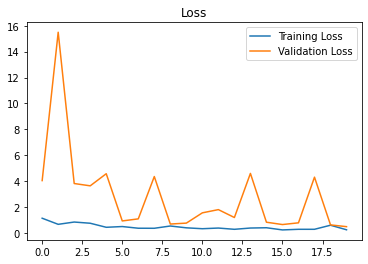

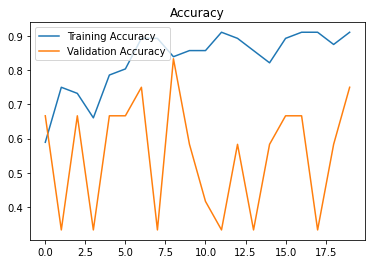

In [ ]:
plot_metrics(history)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

train Accuracy = 0.95


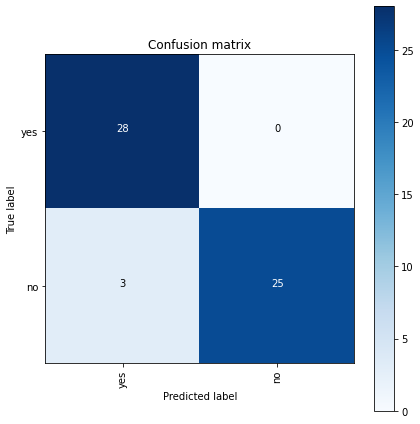

In [ ]:
labels = ['yes','no']
# validate on val set
predictions = model.predict(X_train)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_train, predictions)
print('train Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_train, predictions) 
cm = plot_confusion_matrix(confusion_mtx, classes = labels, normalize=False)

Test Accuracy = 0.75


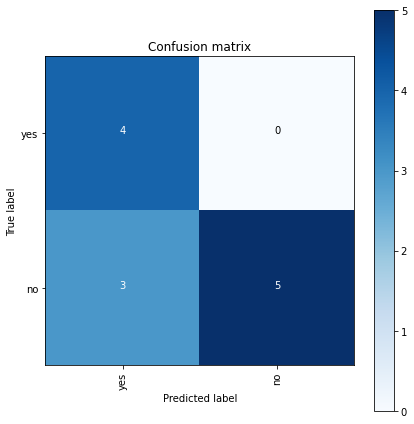

In [ ]:
# validate on test set
predictions = model.predict(X_test)
predictions = [1 if x>0.5 else 0 for x in predictions]

accuracy = accuracy_score(y_test, predictions)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, predictions) 
cm = plot_confusion_matrix(confusion_mtx, classes = labels, normalize=False)

In [ ]:
import itertools
from sklearn import metrics
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report

In [ ]:
pred = model.predict(X_test)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_test, labels)) #target_names = categories))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.62      0.77         8

    accuracy                           0.75        12
   macro avg       0.79      0.81      0.75        12
weighted avg       0.86      0.75      0.76        12



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

